In [ ]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *
%matplotlib inline
import matplotlib.pylab as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/BA305- Team Project/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['diagnosis'] = df['diagnosis'].replace("M", 1)
df['diagnosis'] = df['diagnosis'].replace("B", 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df_se_col=df.filter(regex='_se').columns
df_mean_col=df.filter(regex='_mean').columns
df_worst_col=df.filter(regex='_worst').columns

*Please un-comment the code based on which columns you would like to run on.*

Mean + Worst Columns

In [ ]:
#dataset with mean and worst columns
df=df.drop(df_se_col, axis=1)

#df_meanworst.info()
#print(list(df_se.columns))

**Mean Columns**

In [ ]:
#dataset with all mean columns
#df=df.drop(df_se_col, axis=1)
#df=df.drop(df_worst_col, axis=1)

#df_mean.info()
#print(list(df_mean.columns))

**Worst Columns**

In [ ]:
#dataset with all worst columns
#df=df.drop(df_se_col, axis=1)
#df=df.drop(df_mean_col, axis=1)

#df_worst
#print(list(df_worst.columns))

In [ ]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_worst             569 non-null    float64
 13  texture_worst            569 non-null    float64
 14  perimeter_worst          5

In [ ]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

## **Build the 'Full' Tree**

In [ ]:
# Build "Full Tree"
full_clf = DecisionTreeClassifier(random_state=0)
full_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
print('Number of nodes', full_clf.tree_.node_count)

Number of nodes 29


In [ ]:
# Text representation of full tree
text_representation = tree.export_text(full_clf)
print(text_representation)

|--- feature_13 <= 104.95
|   |--- feature_18 <= 0.15
|   |   |--- feature_7 <= 0.14
|   |   |   |--- feature_19 <= 0.20
|   |   |   |   |--- feature_19 <= 0.20
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_19 >  0.20
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_19 >  0.20
|   |   |   |   |--- class: 0
|   |   |--- feature_7 >  0.14
|   |   |   |--- feature_17 <= 0.46
|   |   |   |   |--- class: 1
|   |   |   |--- feature_17 >  0.46
|   |   |   |   |--- class: 0
|   |--- feature_18 >  0.15
|   |   |--- feature_19 <= 0.32
|   |   |   |--- class: 0
|   |   |--- feature_19 >  0.32
|   |   |   |--- class: 1
|--- feature_13 >  104.95
|   |--- feature_12 <= 20.65
|   |   |--- feature_14 <= 964.40
|   |   |   |--- class: 0
|   |   |--- feature_14 >  964.40
|   |   |   |--- feature_10 <= 0.05
|   |   |   |   |--- class: 0
|   |   |   |--- feature_10 >  0.05
|   |   |   |   |--- class: 1
|   |--- feature_12 >  20.65
|   |   |--- feature_15 <= 0.10
|   |   |   |---

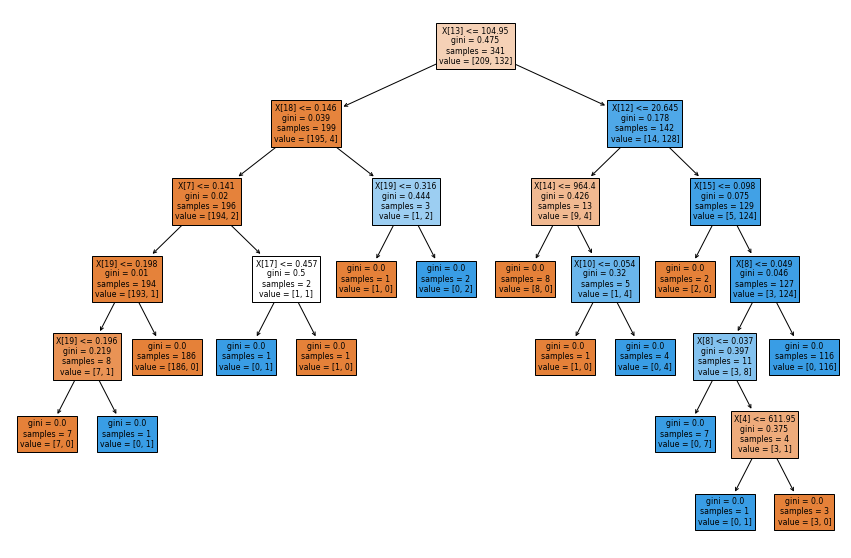

In [ ]:
# Visualize the full tree via "plot_tree" function

# First, re-size the figure via matplotlib(otherwise it will be too small)
plt.figure(figsize=(15,10))

# Then call plot_tree() function
# the 'filled' option generates colors in the nodes
tree.plot_tree(full_clf, filled=True);

In [ ]:
# Feed input data to model to predict y output, for training data and test data, separately
y_pred_train = full_clf.predict(X_train)
y_pred_test = full_clf.predict(X_test)

In [ ]:
# Accuracy of full tree on training and test sets
train_score = accuracy_score(y_train, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

print('Accuracy score of full tree on training data =', round(train_score*100,1), '%')
print('Accuracy score of full tree on testing data =', round(test_score*100,1), '%')

Accuracy score of full tree on training data = 100.0 %
Accuracy score of full tree on testing data = 92.1 %


In [ ]:
# Confusion matrix of full tree on test set
print("Confusion Matrix on train data (watch out for overfitting!):")
print(confusion_matrix(y_train, y_pred_train))

print("Confusion Matrix of full tree on test data:")
print(confusion_matrix(y_test, y_pred_test))

Confusion Matrix on train data (watch out for overfitting!):
[[209   0]
 [  0 132]]
Confusion Matrix of full tree on test data:
[[139   9]
 [  9  71]]


## **Build a 'Reduced' Tree (less prone to overfitting)**

In [ ]:
# The most popular ones:
# max_depth : maximum number of splits
# min_samples_split :  The minimum number of samples required to split a node
# min_samples_leaf : Minimum # of samples inside of every leaf
# min_impurity_decrease : minimum absolute 'error' improvement to justify a split
# criterion : gini (default) or entropy
# ...

clf = DecisionTreeClassifier(
      max_depth=10, 
      min_samples_split = 40, 
      min_samples_leaf = 20,
      min_impurity_decrease = 0.01,
      criterion = 'gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.01,
                       min_samples_leaf=20, min_samples_split=40)

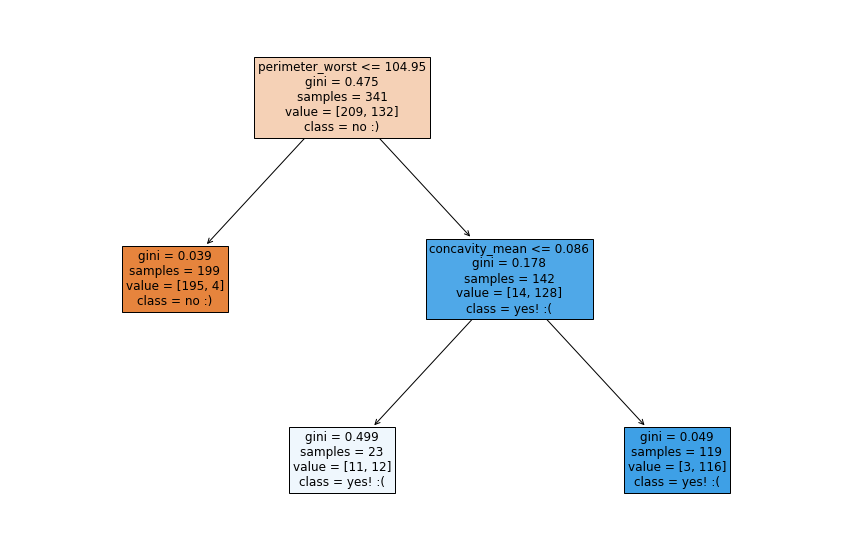

In [ ]:
# Plot the reduced tree
fig = plt.figure(figsize=(15,10))
# define class names
cnames = ['no :)','yes! :('] 
tree.plot_tree(clf, fontsize=12, feature_names=X.columns, class_names=cnames, filled=True);

In [ ]:
# Confusion matrix of "smaller" tree
y_pred = clf.predict(X_test)

print("Accuracy score of reduced tree on test data :", accuracy_score(y_test, y_pred)*100, "%")

print("Confusion Matrix of reduced tree on test data:")
confusion_matrix(y_test, y_pred)

Accuracy score of reduced tree on test data : 86.40350877192982 %
Confusion Matrix of reduced tree on test data:


array([[128,  20],
       [ 11,  69]])

Visualize the tree using the external 'dtreeviz' package

In [ ]:
%%capture
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


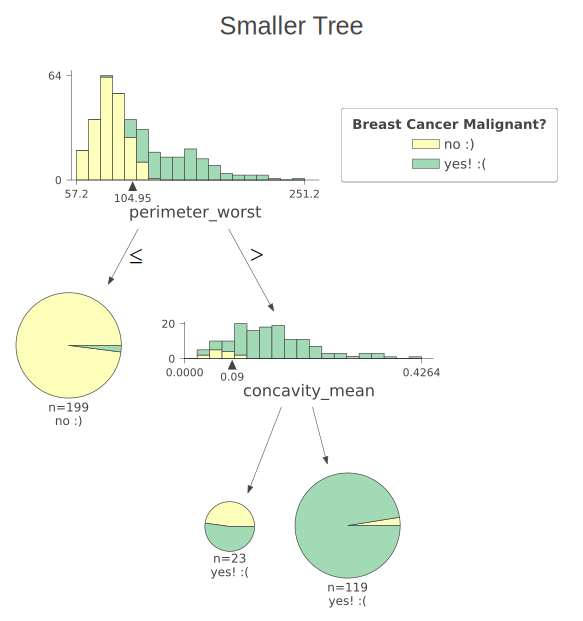

In [ ]:
viz = dtreeviz(clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='Breast Cancer Malignant?',
               feature_names=X.columns, 
               class_names=['no :)', 'yes! :('],
               title="Smaller Tree",
               scale=1.8); 
viz

## **Bonus Content for Classification Trees: Pruning, K-fold, Grid Search, Random Forest**

## Bonus: Pruning the full tree with penalty parameter $\alpha$

reminder: alpha is a penalty score that we add to penalize excessive growth.

Every time the tree splits on a node, it might increase its accuracy, but it will also incur an extra penalty of size alpha.

In [ ]:
# Retrieve all the 'unique' values of penalty alpha and the impurity score
# they generate, from the full tree. We will use the cost_complexity_pruning_path() function
# To retrieve the alpha values, we need to call the option 'ccp_alphas'
alphas = full_clf.cost_complexity_pruning_path(X_train, y_train).ccp_alphas

In [ ]:
alphas

array([0.        , 0.00290263, 0.00391007, 0.00439883, 0.00469208,
       0.00639042, 0.00746827, 0.01100919, 0.01154974, 0.02958526,
       0.37750094])

In [ ]:
# Create a decision tree for each possible value of alpha, and store the 
# trees in an array called 'clfs'

clfs = [] # this creates an empty array (placeholder)

# now loop through all the possible alphas
for i in alphas:
    my_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    my_clf.fit(X_train, y_train)
    clfs.append(my_clf) #this line adds to the fitted tree to the clfs[] array

# Display final array of Trees:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0029026273265904626, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0039100684261974585, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004398826979472141, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004692082111436949, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006390421871752837, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007468266783275005, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011009194675189894, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011549740581998647, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.029585255074726063, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.3775009355228311, random_state=0)]

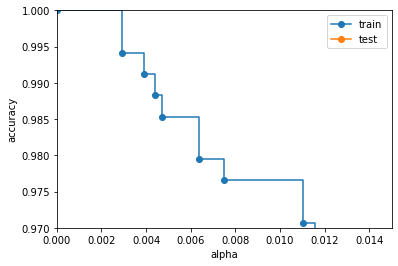

In [ ]:
# Let's try to find the best alpha to use...
# We can plot the tree predictive accuracy as a function of alpha
train_scores = [accuracy_score(y_train, x.predict(X_train)) for x in clfs]
test_scores = [accuracy_score(y_test, x.predict(X_test)) for x in clfs]

# BTW, there is also an alternative function: score() that does the same thing
# train_scores = [x.score(X_train, y_train) for x in clfs]
# test_scores = [x.score(X_test, y_test) for x in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
plt.xlim(0,0.015)
plt.ylim(0.97,1)
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## **Bonus: K-Fold cross-validation**

In [ ]:
# Five-fold cross-validation of the decision tree using cross_val_score function
# We're going to use the tree stored in 'clf' variable
accuracy_scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in accuracy_scores])
print('5-fold cross-validation mean accuracy:', round(accuracy_scores.mean(),3))

Accuracy scores of each fold:  ['0.913', '0.926', '0.971', '0.941', '0.926']
5-fold cross-validation mean accuracy: 0.936


## **Bonus: Grid search over parameters to optimize the tree**

In [ ]:
# We create lists of all the values we want to search over
# This is called 'creating a grid'
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_leaf': [20, 50, 100, 200],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}

# Then, use the GridSearchCV function which combines gridsearch with 
# K-fold cross validation (cv parameter)
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring = 'accuracy')
gridSearch.fit(X_train, y_train)

print('Best accuracy: ', gridSearch.best_score_)
print('Parameter values to achieve best accuracy: ', gridSearch.best_params_)

Best accuracy:  0.9413895993179882
Parameter values to achieve best accuracy:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_leaf': 50}


# **Bonus: Random Trees**

In [ ]:
# Import the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Run the RF classifier, specifying the number of trees to generate
# Note, being careful about overfitting is not as critical
# when using random forest classifiers, given they randomize over
# the data and the feature columns
rf = RandomForestClassifier(
    n_estimators=2000, 
    random_state=0, 
    criterion='gini', 
    min_samples_leaf = 20)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=20, n_estimators=2000, random_state=0)

In [ ]:
print(accuracy_score(y_test, rf.predict(X_test)))
confusion_matrix(y_test, rf.predict(X_test))

0.9035087719298246


array([[137,  11],
       [ 11,  69]])

Even though we cannot visualize Random Forests easily, we can still get a sense of the average importance of each feature in the dataset, using the feature_importances_ function. Feature importance is based on mean decrease in impurity (averaging across all the trees generated in the random forest)

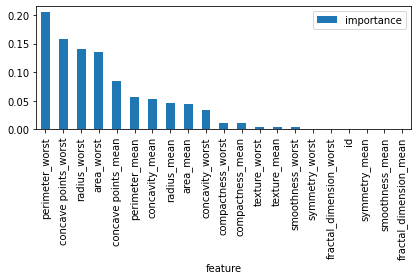

In [ ]:
# Extract importance values for each feature (column of X)
importances = rf.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

# **3: Regression Trees**
Let's now reset, and focus on a different objective: trying to predict 'Income' based on the other features of the dataset. The Decision Tree will work the same with one important difference: the criterion to evaluate accuracy will no longer be the gini score, but rather, the sum of squared errors (since we are trying to predict 'income' which is a numerical variable).

In [ ]:
# We first need to import the Regression Tree package from sklearn
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# As a reminder, here is our dataset:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Re-define X (inputs/predictors) and y (output/outcome) 
y_reg = df['diagnosis']
X_reg = df.drop(columns=['diagnosis'])

In [ ]:
# Split data into training and testing
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.4, random_state=0)

In [ ]:
# Call the Decision Tree Object with parameters
# We're going to set max depth to 5 to keep things manageable
clf_reg = DecisionTreeRegressor(
      max_depth=5, 
      min_samples_split = 40, 
      min_samples_leaf = 100,
      min_impurity_decrease = 0.01,
      criterion = 'squared_error')

# Fit the model to the training data
clf_reg.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.01,
                      min_samples_leaf=100, min_samples_split=40)

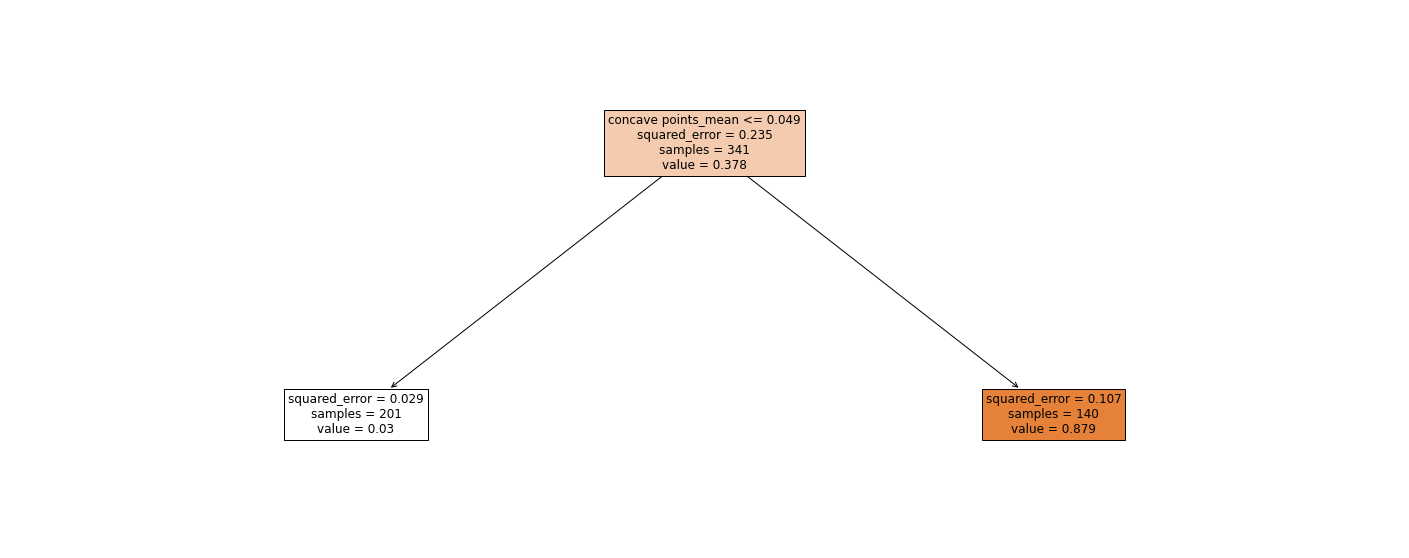

In [ ]:
# Plot the regression tree
fig = plt.figure(figsize=(25,10))
tree.plot_tree(clf_reg, fontsize=12, feature_names=X_reg.columns, filled=True);

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


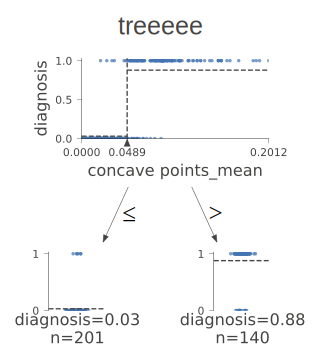

In [ ]:
# dtreeviz has an even better display...
viz = dtreeviz(clf_reg, 
               x_data=X_train_reg,
               y_data=y_train_reg,
               target_name='diagnosis',
               feature_names=X_reg.columns,
               title="treeeee",
               scale=1.8); 
viz

In [ ]:
# Evaluate the accuracy of the tree
y_pred_reg = clf_reg.predict(X_test_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg,y_pred_reg))
r2 = r2_score(y_test,y_pred)
print("RMSE=", round(rmse,3), "R2=", round(r2,3))

RMSE= 0.325 R2= 0.403
